# Women's Clothing E-Commerce with Natural Language Processing 
_by Nick "Upping his game for 2018" Brooks, Janurary 2018_

- [**Github**](https://github.com/nicapotato)
- [**Kaggle**](https://www.kaggle.com/nicapotato/)
- [**Linkedin**](https://www.linkedin.com/in/nickbrooks7)

***

**Programming Language:** Python 3.5 in the Jupyter Notebook Environment

**Textbook Resources Used:** <br>
- Swamynathan, Manohar. Mastering Machine Learning with Python in Six Steps: a Practical
- Implementation Guide to Predictive Data Analytics Using Python. Apress, 2017.
- Bird, Steven. Natural Language Processing with Python. O&#39;Reilly Media, 2016.

**Code Navigation:** <br>
In the code, text after hastags (#) are supportive explanations, not executed as code.
Indented line signifies code is part of larger function or loop. Not standalone. Furthermore,
functions are used in order to facilitate the simplicity and exploratory process of the code.
Code: Packages Used

# Tables of Content:

**1. [Introduction](#Introduction)** <br>
**2. [Univariate Distribution](#Univariate)** <br>
**3. [Multivariate Distribution](#Multivariate)** <br>
	- 3.1 Categorical Variable by Categorical Variable
	- 3.2 Continuous Variable by Categorical Variable
	- 3.3 Continuous Variables  on Continuous Variables
	- 3.4 Percentage Standardize Distribution Plots
    
**4. [Multivariate Analysis](#Multianalysis)** <br>
	- 4.1 In-Depth Simple Linear Regression Analysis for Age mean and Recommended Likelihood    
	- 4.2 Residual Visualization [Like found in R Studio]
**5. [Working with Text](#Text)** <br>
	- 5.1 Text Pre-Processing
	- 5.2 Sentiment Analysis
**5. [Sentiment Analysis](#Sentiment Analysis)** <br>
**6. [Word Distribution and Word Cloud](#Word Distribution and Word Cloud)** <br>
**7. [N Grams by Recommended Feature](#NGRAM)** <br>
**8. [Supervised Learning](#Supervised Learning)** <br>
	- 8.1 Naive Bayes
**9. [Word2Vec](#Word2Vec)** <br>


# **1. Introduction:** <a id="Introduction"></a> <br>
This notebook is concerned with using the Python programming language and Natural Language Processing technology to explore trends in the customer reviews from an anonymized women’s clothing E-commerce platform, and extract actionable plans to improve its online e-commerce. The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. The total number of unique words in the dataset is 9810. In this analysis, the data will be introduced using exploratory data analysis, and will be further analyzed by employing:

** METHODS **
- **Text Pre-Processing**
- **Data Visualization**
- **Frequency distribution**
- **Word Clouds**
- **Sentiment Analysis**
- **Naive Bayes**
- **Word2Vec**

My goal is to get to understand what it is the customers appreciate and dislike about their purchases. To reach this goal, I conduct an observational study of this sizable dataset, first by understanding the characteristics of individual features, and ramping the complexity of the analysis once a proper target is envisioned. 


# Summarized Findings:


In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
# import warnings
# warnings.filterwarnings('ignore')

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Code Explanation and Reasoning:** <br>
These packages are seperated in four categories: *General, Visualization, Pre-Processing, and Modeling*.

The General category includes the basic data manipulation tools for scientific computation (`numpy`), dataframes (`pandas`), Natural Language Processing (`NLTK`), path directory manipulation (`os`), and image saving (`PIL`).

The Visualiation section enables the creation of simple graphics (`matplotlib`, `seaborn`), aswell as `wordcloud`'s text frequency visualization.

The Pre-Processing section extracts more specialized modules from the NLTK package such as tokenizers and stemmers to enable the preperation of text data for mathematical analysis.

The Modeling section includes `nltk`’s sentiment analysis module, which can determine the mood of text, NLTK’s N-grams, and `gensim.models`’s word2vec. It also includes `statsmodels.api` which offers an array of linear models.

In [2]:
# Read and Peak at Data
df = pd.read_csv("Data/Women's Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5574,861,60,Purple floral tee,I think 56 reviews says it all! basic tee with...,5,1,1,General,Tops,Knits
14243,966,43,Cute but not for me,"I'm 5'6'' , athletic build-thought it was cute...",3,0,0,General,Jackets,Jackets
20657,949,58,NaN,"I wear size 8 , ordered a medium, fits great. ...",5,1,1,General,Tops,Sweaters


In [3]:
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

# Converting to Categorical Vars
# for x in [x for x,y,z in unique_count if y < 40]:
#     df[x]= df[x].astype('category')

# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Missing Values: 2966
Dataframe Dimension: 22628 Rows, 11 Columns


**Code Explanation and Reasoning**: <br>
After reading in the data, a binary variable is created to better to generalize "good" and "bad" reviews. It is important to note that rating is a personal level judgement. Perhaps the "Recommended" feature may provide more insight into the value of the product, since customers are putting their reputation on the line to state whether they think its worth wearing. This social dimension is paramount when it comes to this product. Indeed, I found that many reviews would declare the social responce and experience they had while wearing the clothing item.

Next, the dataset is purged of observation where the review text is unavailable. This was done because the review is the heart of this analysis. Infact, there are additional missing values, which I will leave for now, since they may provide usable extra information.

***

## 2. Univariate Distribution <a id="Univariate"></a>

To start off my analysis, I will first take a look at the distribution of individual variables. This is a good way to see what I am up against, and understand the context of the subsequent multi-variate analysis.

In [4]:
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
Unique,1172,77,13984,22621,5,2,82,3,6,20,2
Missing,0,0,2966,0,0,0,0,0,0,0,0


**Interpretation** <br>
There are approximately 3000 missing values, which represents 1% of the dataset, but the dataset will not get trimmed further since the review text body is the only variable that must be complete.

Amongst the categorical variables, the high unique count of Clothing ID and Class Names will require non-visual exploratory methods.

***

**Age and Positive Feedback Count Distributions:**

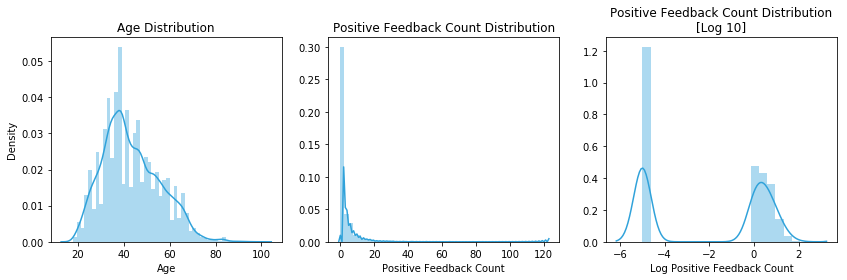

In [5]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+0.00001)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

**Code Explanation:** <br>
Using seaborn, a simple variable frequency bar/density plot is created. In the log positive feedback count plot, I had to add 0.0001 to all values so that the logarithm of previously zero values can be taken. Matplotlib's subplots function is employed through assign each plot the **AX** arguement.

**Distribution of Age:** <br>
My a priori expectation was that the biggest group of reviewing customers would be young, tech savvy women between the age of 18 and 34. However, this plot would say otherwise, since it appears that not only is the 34 to 50 year old age most engage in reviewing products, they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers. Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50.

**Distribution of Positive Feedback Count:** <br>
This kind of distribution is common for network effect phenomenon, where popularity has an exponential effect on response, and most individuals receive no attention.

***

**Division Name and Department Name Distribution**

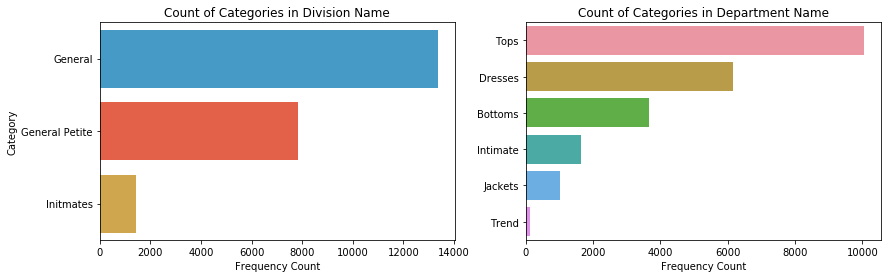

In [6]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

**Code Explanation:** <br>
Enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

**Distribution of Division Name** <br>
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

**Distribution of Department Name** <br>
It is notable to observse that *Tops and Dresses* are the most commonly reviewed products. It would be interesting to investigate the motivation of leaving a review in the first place.

***
**Distribution of Clothing ID to Undertand Product Popularity**

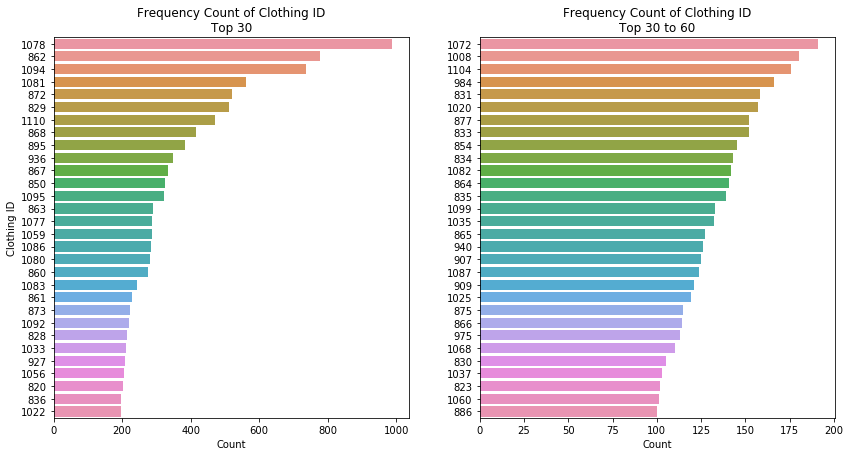

In [7]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")

plt.show()

In [8]:
df[df["Clothing ID"].isin([1078, 862,1094])].describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Label
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1015.484800,42.724800,4.189200,0.818400,2.862400,0.902400
std,103.396022,12.150429,1.104306,0.385592,6.773021,0.296832
min,862.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,862.000000,34.000000,4.000000,1.000000,0.000000,1.000000
50%,1078.000000,41.000000,5.000000,1.000000,1.000000,1.000000
75%,1094.000000,51.000000,5.000000,1.000000,3.000000,1.000000
max,1094.000000,99.000000,5.000000,1.000000,98.000000,1.000000


In [9]:
df[df["Clothing ID"].isin([1078, 862,1094])].describe(include=["O"])

,Title,Review Text,Division Name,Department Name,Class Name
count,2180,2500,2500,2500,2500
unique,1815,2500,2,2,2
top,Beautiful dress,This is a beautiful dress. lovely fit. unfortu...,General,Dresses,Dresses
freq,21,1,1524,1722,1722


**Code Explanation** <br>
Since they are around one thousand unique *Clothing IDs*, I used boolean operators to only select the top 60 most popular cloth items, then optimizing notebook real estate by splitting them in two plot columns.

**Interpretation** <br>
It appears like there are around three products that receive a small magnitude more reviews than others. I follow up on these findings by observing the descriptive statistics of the top three items. These items received an average rating of ~4.2, and an average recommendation rate of 81%. Furthermore, it appears that these products are predominately normal sized dresses.

These observations make me wonder about the nature of review popularity and rating performance. A question that could shed light on the customer's motivation to leave a review.

***
**Distribution of Class Name**

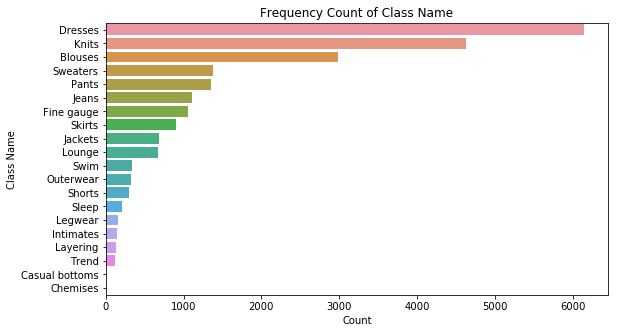

In [10]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

**Interpretation:** <br>
Exploring the class variable suggests that the most popular clothing types are: Petite and Anthro, Dresses, Blouses, and Cut and Sew Knits. The distribution of reviews is fairly constant, suggesting that there are not negative nor positive outliers. This statement has been further verified by taking the mean of the label by class group. The results show that no class falls above .80, and the majority rest at .90. Casual bottoms and Chemises scored the highest in this criteria with a 100% positive review rate, however upon investigation this is because only 4 reviews were made in these categories.

***
**Distribution of Rating, Recommended IND, and Label

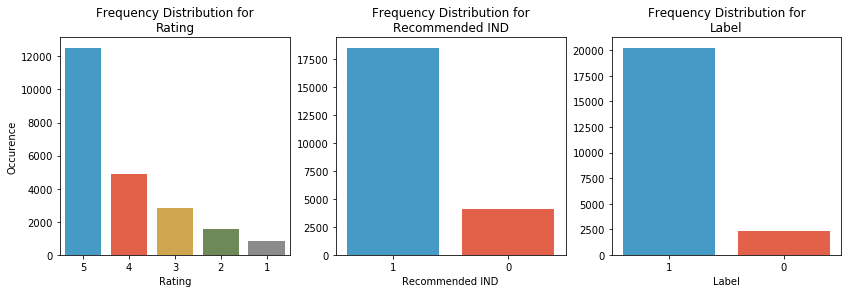

In [11]:
cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

**Code Explanation:**
Yet another way to iterate plots, where I both loop over the index position of cat_dtypes and subplot ax at the same time with range of the length of cat_dtypes.

**Distribution of Rating:** <br>
The vast majority of reviews were highly positive, with a score of five out of five. This suggests that this retail store is performing fairly well, but then again, I am not familiar with the industry benchmark. Competitor reviews may be scraped and analyzed. It is important to note that these reviews are subjective, and some negative reviews may a outcome of a bad day, instead of constructive feedback. In the plot below, the Label plot is the binary classification of 1 = good, and 0= bad.

**Distribtuion of Recommended IND:** <br>
This variable mirrors the positivity of the Rating distribution, but as mentioned earlier, I believe that it provides variation of positivity which is social, rather than personal.

**Distribution of Label:** <br>
I am surprised to see that products are rated 3 and over, than are recommended by the customer. I am eager to see the multi-variate interaction between Rating and Recommended.

I find these three variables especially promising in the quest of finding how cutomers express dislike. In the multivariate secion, I shall explore the interplay between these varibles.

***

## 3. Multivariate Distribution <a id="Multivariate"></a>
### 3.1 Categorical Variable by Categorical Variable
In this section, I utilize heatmaps to visualize the percentage occurence pivot table. Note that I heavily utilized the technique of normalizing the proportion between variables classes by converting frequency into percentages. This technique is very fruitful because the relation upon which the percentage can be explored by aggregate, by index, and by column, each of which providing its own unique insight.

**Division Name by Department Name:**

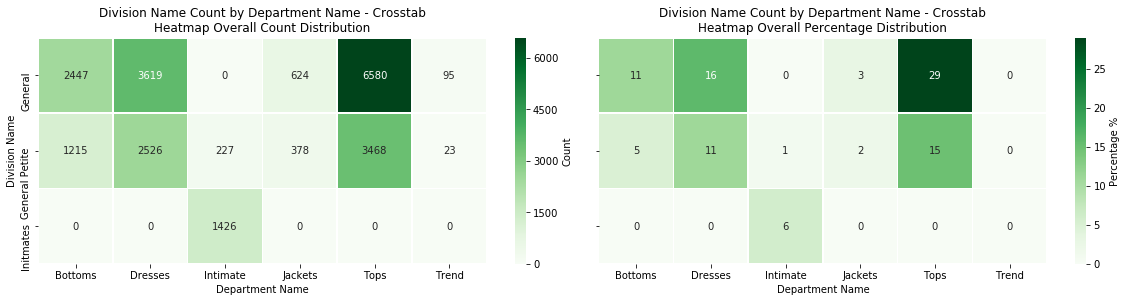

In [12]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
For the second heatmap on the right, the percentages occurence is in relation to the whole.

**Interpretation:** <br>
Evidently, the most common product is a normal sized top.

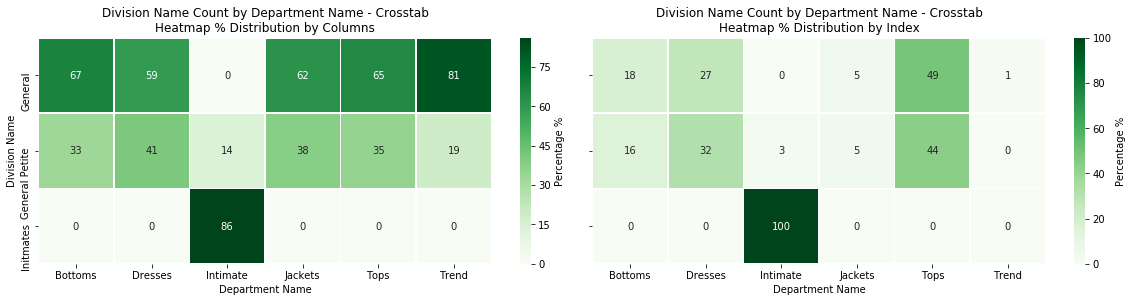

In [13]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
Although these two heatmaps use the same features, they different in the relation in which the percentage is taken. For the first plot on the left, the percentages add up to 100% by **column**, while the plot on the right has is **normalized into percentages by row**.

**Interpretation:** <br>
The dominance of the *General* size is consistent accross the various categories within **Department Name**. There a notable overall between *General Petite* and *Department Name*.

***

**Class Name by Department Name:**

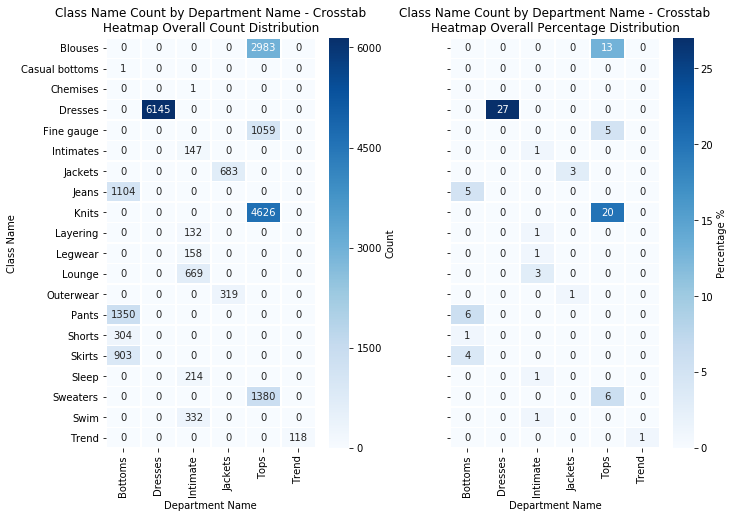

In [14]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:** <br>
Here we get a closer glimpse at the breakdown of specific clothing types. Up to now, the dominance of dress popularity has ben evident, but not that of "Knits". This is a kind of thickly thread and colorful top item which I must confess I have not seen much of out in the real world. 

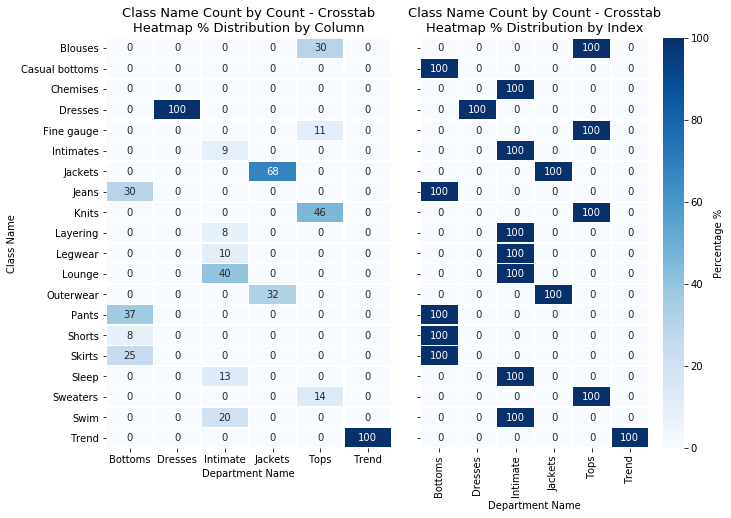

In [15]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:**
This normalization of percentage by column and index explains how clothing types are distributed across departments. This provides a clear way to see which products are dominant within each category. Following up on knits, it appears that the runner up in the "Tops" category, "Blouses", is not that far behind.

***
**Division Name by Department Name:**

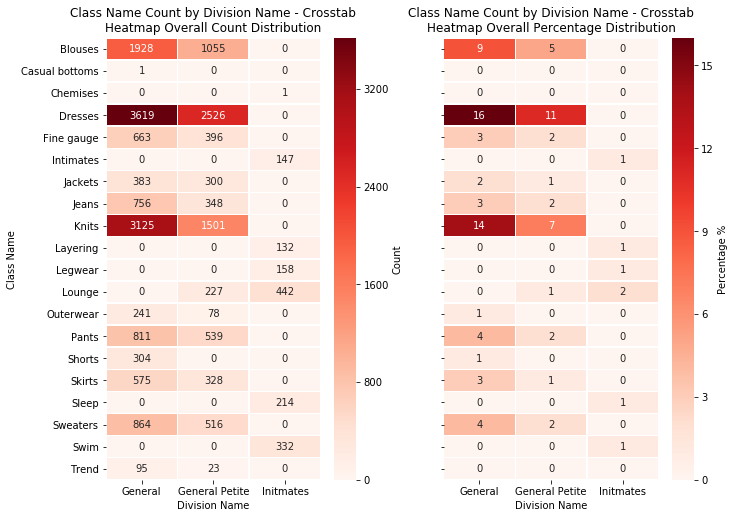

In [16]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

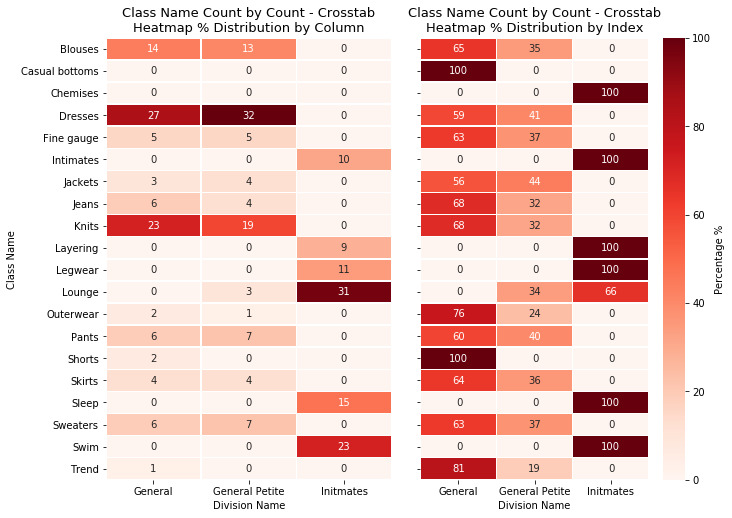

In [17]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Reds")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)

# MANUAL NORMALIZE with Applied Lambda on Pandas DataFrame
# ctab = pd.crosstab(df['Class Name'], df["Rating"]).apply(lambda r: r/r.sum(), axis=1).mul(100)

**Interpretation:** <br>
I think this plot wraps up the interplay between Blouses, Dresses, and Knits by showing that most reviews revolve around the normal sized version of the products. It is interesting to note that Dresses attract higher proportion of "Petite" sized customers.

***
### 3.2  Continuous Variable by Categorical Variable

Here I want to look at the behavior of the continous variables when sliced by various categorical varibles. The general theme of this section is that there is no clear slicing of continuous on categorical variables that provide a clear, distinct pattern.

**Positive Feedback Count Distribution by Rating, Department Name, Recommended IND, and Class Name**

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


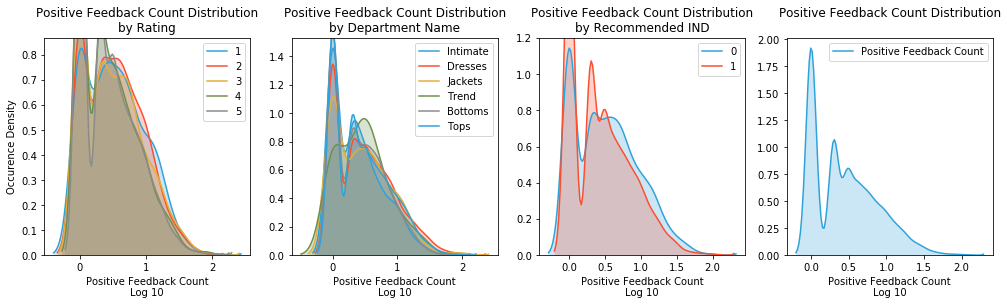

In [18]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plotdf = np.log10(df['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))

axes[0].set_ylabel('Occurence Density')

sns.kdeplot(plotdf,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
plt.show()

**Interpretation:** <br>
I am quite surprised not to find a clear difference between the Recommended levels and Positive Feedback Count. However, since Positive Feedback Count is in log form, the higher frequency of non-recommended (0) reviews suggests that reviews with high response are constructive criticism, since they are items that the reviewer would not want others to buy.. yet.

***

**Positive Feedback Count by Class Name:** <br>

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


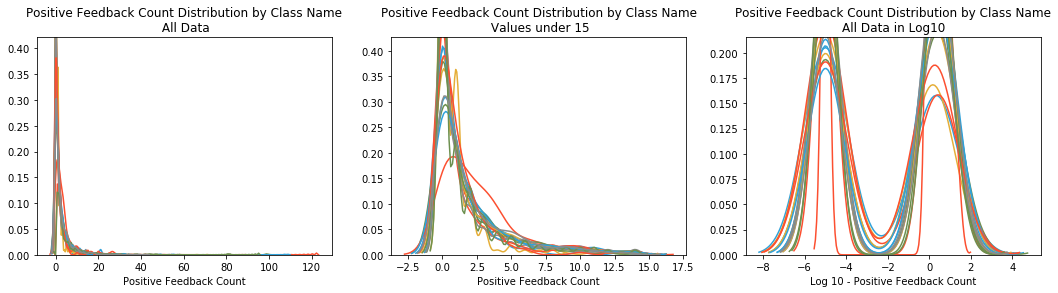

In [19]:
f, axes = plt.subplots(1,3, figsize=(18,4), sharex=False)
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[0])
    
axes[0].legend_.remove()
axes[0].set_xlabel('{}'.format(xvar))
axes[0].set_title('{} Distribution by {}\n All Data'.format(xvar, "Class Name"))

min_value = 15
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df["Class Name"]==x) &
                                              (df["Positive Feedback Count"] < min_value)]
                ,label=x, shade=False, ax=axes[1])
    
axes[1].legend_.remove()
axes[1].set_xlabel('{}'.format(xvar))
axes[1].set_title('{} Distribution by {}\n Values under {}'.format(xvar, "Class Name", min_value))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count']+0.00001)[df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[2])
    
axes[2].legend_.remove()
axes[2].set_xlabel('Log 10 - {}'.format(xvar))
axes[2].set_title('{} Distribution by {}\nAll Data in Log10'.format(xvar, "Class Name"))
plt.show()

Not much to say here. There are too many classes to include a legend.. Perhaps a statistical method would operate better at this dimensionality.

***
**Age Distribution by the Usual Suspects.. round them up**


D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


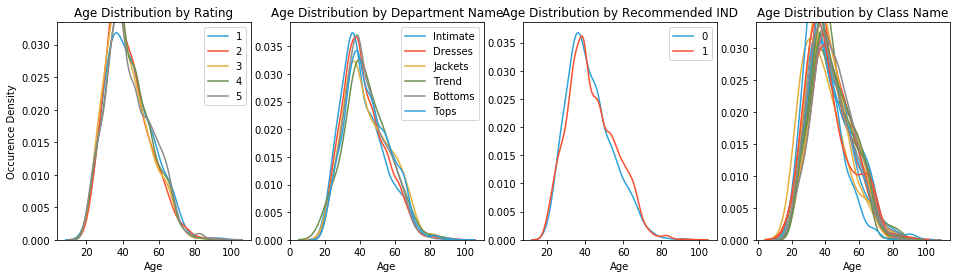

In [20]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** <br>
Unlike Positive Feedback Count, Age has not been transformed into a logarithm. For these reasons, slight noise between the age distribution by these features are nothing to worry about. Age doesn't seem to receive influence on these dimensions.

### 3.3 Continuous Variables  on Continuous Variables

Time for some scatter plots. with [Seaborn Joint Plot](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/).

In [21]:
def minmaxscaler(df):
    return (df-df.min())/(df.max()-df.min())
def zscorenomalize(df):
    return (df - df.mean())/df.std()

Normalization is futile here.. But here is a minmax standardization, and a z-score normalization function. 

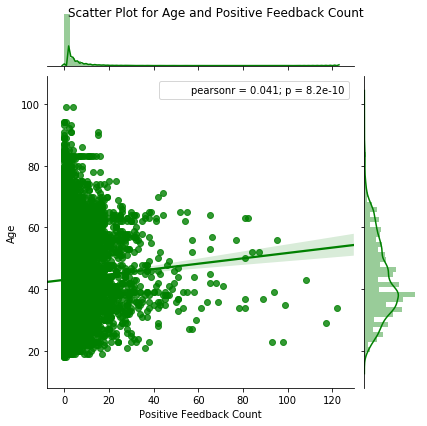

In [22]:
g = sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

**How to Interpret:** <br>
Dont be deceived by the seamingly numerious points over the Positive Feedback Count value of 0! The distribution plot up top clearly shows that most points reside at ZERO!

**Interpretation:** <br>
There appears to be a slight correlation between age and positive feedback count received. It would be interesting to focus on the textual anatomy of high positive feedback reviews.
***

### 3.4 Percentage Standardize Distribution Plots

Since many variables are severely unbalanced, I employ standardization by perentage to see if the proportion is consistent between categorical classes. This is the same idea used previously on heatmaps now applied to barcharts!

[Percentage Standardize in Seaborn - Stackoverflow](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)

In [23]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

**Code Explanation:** <br>
Many transformation are conducted here.
- Groupby([x])[hue]: Groups the data by the x variable, what will become the X axis of the barplot.
- Value_counts(normalized=True): Then the hue variable, which is rowed by the x variable, is ordered by most frequent to least, and that value is converted to decimal percentgge.
- rename().mull(100): Then this is renamed to "Percentage", and the decimal value is multiplied by 100 to be in proper percentage units.

***
**Recommended IND by Department and Division**

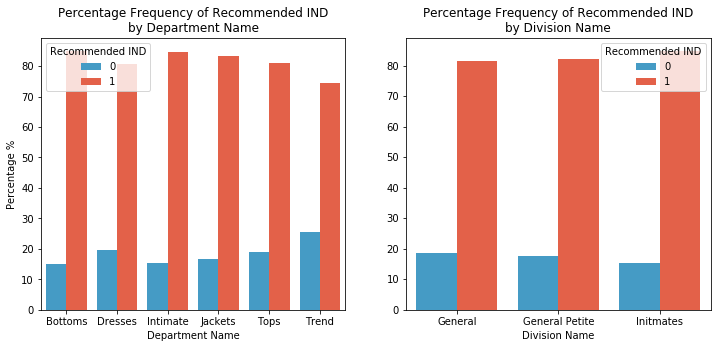

In [24]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x="Department Name",y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x="Division Name",y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby Division Name".format(huevar))
axes[1].set_ylabel("")
plt.show()

**Interpretation:** <br>
The finding here is the same as the earlier heatmap. Nothing tremendous.

***
**Rating by Department and Divison Name**

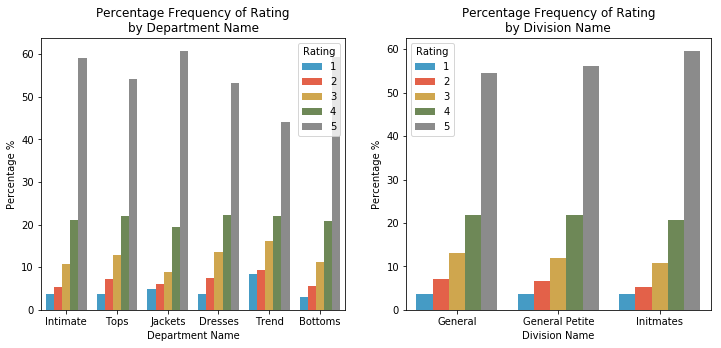

In [25]:
xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x=xvar[0],y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x=xvar[1],y="Percentage", hue="Rating",data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

**Interpretation:** <br>
Department and Divison are consistent with the overall distribution of Rating.

***
**Positive Feedback Count over 40 by Recomended IND and Rating**

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


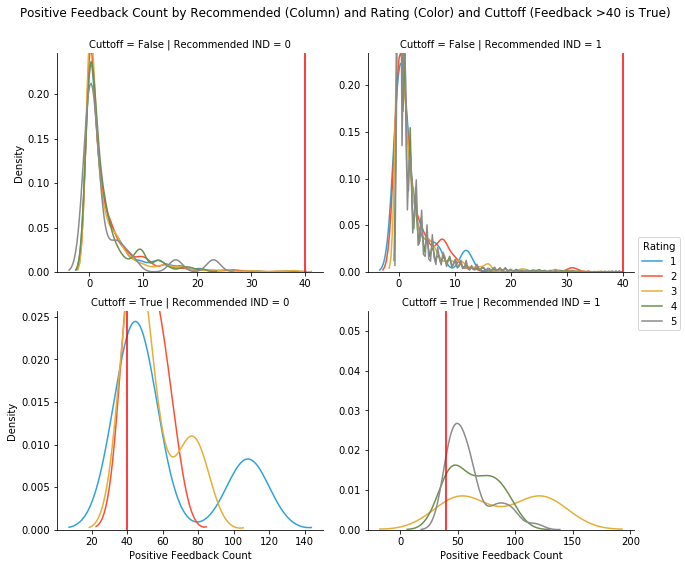

In [26]:
# Cuttoff Variable
df["Cuttoff"] = df["Positive Feedback Count"] >= 40 # Temporary variable for facetgrid
# Facet Grid Plot
g = sns.FacetGrid(df, row = "Cuttoff", col="Recommended IND",
                  hue="Rating", size=4, aspect=1.1, sharey=False, sharex=False)
g.map(sns.distplot, "Positive Feedback Count", hist=False)
g.add_legend()
g.axes[0,0].set_ylabel('Density')
g.axes[1,0].set_ylabel('Density')
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Positive Feedback Count by Recommended (Column) and Rating (Color) and Cuttoff (Feedback >40 is True)')

# Give cutoff line to each plot.
for x in [0,1]:
    for y in [0,1]:
        g.axes[x,y].axvline(x=40, c="r")

plt.show()
del df["Cuttoff"]

**Code Explanation:** <br>
While I have mostly built my multi-plot visualization configuration from scratch, here is an facetplot example which is less complex, but nevertheless, requires carefull planning of new variables/dimensions, such as my "Cutoff" variable.

The red vertical line corresponds to the cutoff rule. Note that KDE likes to smooth out its tails, even though the hard cuttoff would contradict this. More realistic representation would appear with a barplot, but the clutter would be too in-intelligible.

**Interpretation:** <br>
As a follow-up on the preview analysis on the dominant high positive feedback count rate of reiviews recommended by the customer, this plot offers even more nuance.

First finding is the bump in on the bottom left: Cuttoff = True | Recommended IND = 0. Now, this plot explores un-hopeful criticism about certain products, which is why the light blue's (rating = 1) second bump dominates the ~110 positive feedback count range.

The second finding is the the bottom right plot. Here, these are popular reviews which are recommended. It it interesting to see the high spread of the yellow distribution, rating = 3. This indicates that hopefull reviews which offer constructive criticism are the most socially appreciated.

***
**Rating by Recommended IND**

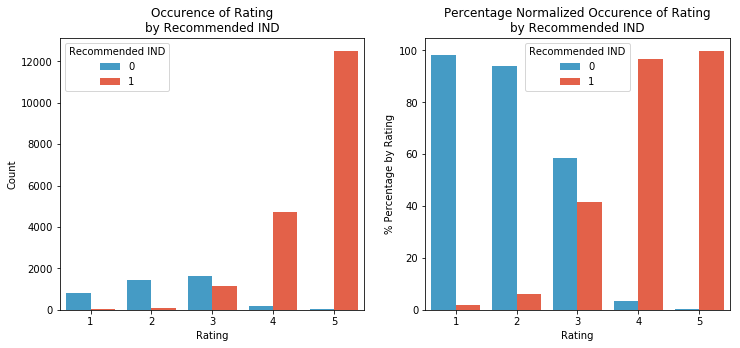

In [27]:
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=df, ax=axes[0])
axes[0].set_title("Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

**Interpretation:** <br>
This is a big one, which returns to my question: "How do customers express their dislike for a Product". There is a conflicting interest between the customers personal interaction with the product, such as the personal size fit, experience, and other personal synergies, and what the customer would invision for other customers.

My theory is that when customers give product a low rating, but nevertheless recommend the item, the customer is protesting about a personal complaint they have, such as a fit issue or customer service and product handling problem all the while still expressing admiration for the product, an approval of style worthy for the body of another.

Looking at the data, it appears like five star ratings are void of non-recommendations, but low rated products are recommended a small amount of the time.

The more even occurence between recommended and non-recommended on products with three rating is a phenomenon worth getting to the bottom of. Especially the recommended portion of the reviews, which might shed light on the biggest limitations of the retailers personal servicing, and the customers personal clothing experience.

***

## 4. Multivariate Analysis and Descriptive Statistics
<a id="Multianalysis"></a>

In this section, I will no longer look at merely observation count by feature, but also look at how averages and other descriptive statistics behave when cut up.

**Rating by Recommended IND**

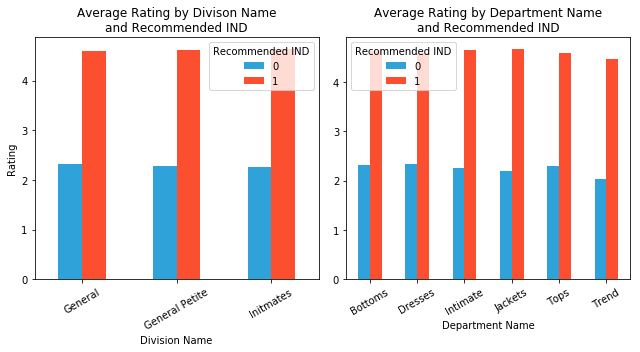

In [28]:
f, axes = plt.subplots(1,2,figsize=(9,5))
rot = 30
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title("Average Rating by Divison Name\nand Recommended IND")
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[0].set_ylabel("Rating")
axes[1].set_title("Average Rating by Department Name\nand Recommended IND")
f.tight_layout()
plt.show()

**Interpretation:** <br>
Here the 

***
**Correlating Average Rating and Recommended IND by Clothing ID** <br>
Analsysi of data grouped by Clothing ID.

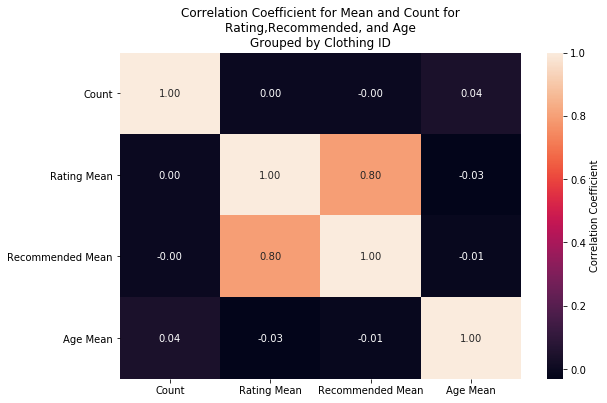

In [29]:
temp = (df.groupby('Clothing ID')[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended IND Count",
                "Recommended Mean","Age Count","Age Mean"]
temp.drop(["Recommended IND Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating,Recommended, and Age\nGrouped by Clothing ID")
plt.show()

**How to Interpret:** <br>
I must stress the *Grouped By Clothing ID* aspect of this analysis. This aggregation investigates if there is trend between average rating and number of reviews by product. This is a different lense of analysis than merely running a correlation on *all customers reviews*.

**Interpretation:** <br>
This correlation heatmap suggest that there is infact no correlation between count and average value, which means that the popularity of the item does not lead to differential treatment when it comes to average scoring. The age variable behaves in this same aswell.

However, There is a strong positive correlation of .80 between rating and recommended IND mean.

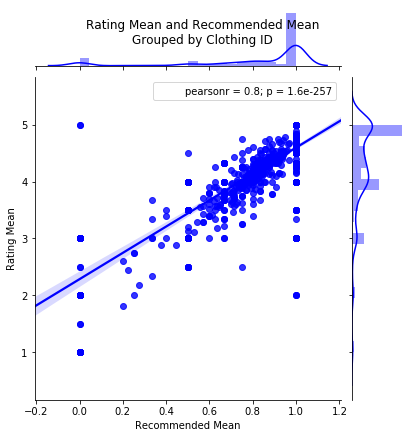

In [30]:
g = sns.jointplot(x= "Recommended Mean",y='Rating Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Rating Mean and Recommended Mean\nGrouped by Clothing ID")
plt.show()

**Interpretation:**

Here is a closer look at this correlation of interest. And look at that p-value! Someone call a publisher.

Jokes aside, perhaps the dots are the bottom left could be the products that un-argueably need attention from the retailer, in the hope of preserving brand image.

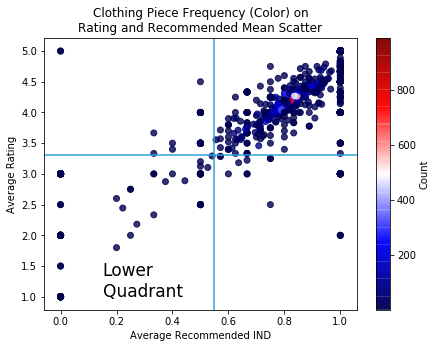

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(temp["Recommended Mean"],temp["Rating Mean"],
            alpha = .8, c =temp["Count"], cmap = 'seismic')
cbar = plt.colorbar() # Color bar. Vive la France!
cbar.set_label('Count', rotation=90)
plt.xlabel("Average Recommended IND")
plt.ylabel("Average Rating")
plt.title("Clothing Piece Frequency (Color) on\nRating and Recommended Mean Scatter")

# Vertical and Horizontal Lines
l = plt.axhline(y=3.3)
l = plt.axvline(x=.55)

# Text
plt.text(.15, 1, "Lower\nQuadrant", ha='left',wrap=True,fontsize=17)

plt.show()

In [32]:
# Descriptives for LOW QUADRANT
temp[(temp["Rating Mean"] < 3.3) | (temp["Recommended Mean"] <= .55)].describe()

del temp # done with this, clear from memory

Follow-up on the previous correlation plot. This plot displays that these outliers are not very strongly represented. Indeed, the average count for the **LOW QUADRANT**, as labeled at the bottom left of the plot, is only 2.3. For these reasons, hyper negative reviews may be unrepresentative outliers, and not taken as the publics general opinion. 

A practise I could envision tackling this problem is to include the average rating of the product class, such as "Dress", in order to relieve customers who may be worried about product with low, hypernegative reviews.

***
**Correlating Average Rating and Recommended IND by Class Name** <br>
- [Stackoverflow Annotating Outliers](https://stackoverflow.com/questions/43010462/annotate-outliers-on-seaborn-jointplot)

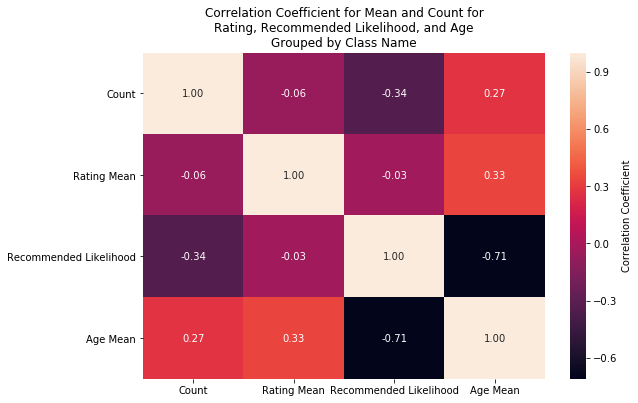

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [33]:
key = "Class Name"
temp = (df.groupby(key)[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended Likelihood Count",
                "Recommended Likelihood","Age Count","Age Mean"]
temp.drop(["Recommended Likelihood Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}".format(key))
plt.show()
print("Class Categories:\n",df["Class Name"].unique())

**Interpretation:** <br>
For the various Class cateogries there a notable correlation between average age and recommendation likelihood. I shall investigate.

***
### **4.1 In-Depth Simple Linear Regression Analysis for Age mean and Recommended Likelihood** <br>
In this part, I want to take a more theorical approach by taking a dive deep into simple linear regression with the goal of explaining, as best as I can, how do evaluate the findings from a *ordinary least squares linear regression*.

My motivation for this is twofold. A friend recently gifted me **Nassim Nicholas Taleb**'s *The Black Swan: The Impact of the Highly Improbable*, which explores the limitations of empiricism when modeling and predicting the future, which may be severely impacted by unforseen phenomenon. This has convinced me to review some of the most simple aspects of statistics, and for my own educational sake, attempt to synthesize them with my own words. Wait what? This notebook is selfish in nature. Yes, some kind of selfish altruism, with the hopes that you all may provide me with feedback on my blindspots. 

The second piece contributed to this section is **EconTalk**'s podcast from Janurary 20th 2018 *John Ioannidis on Statistical Significance, Economics, and Replication*, which describes the reasons behind the replication crisis in social sciences. John P. A. Ioannidis is a Professor of Medicine and of Health Research and Policy at Stanford University School of Medicine and a Professor of Statistics at Stanford University School of Humanities and Sciences, outlines the central issues of using low-powered, unrepresentative, and p-hacked regression models to jump to causal conclusions. Furthremore, the academic incentive of publishing groundbreaking prevents non-thrill analysis from representation. Publishing a paper about the lack of relationship is part of the fabric of scientific discovery through exclusion.

**Simple Regression: Does Average Age correlate with Likelihood of Recommendation:** <br>
Since this is such a simple model, pursuing causation is unrealistic.

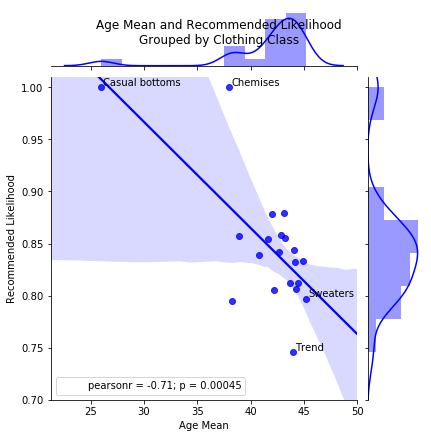

,Count,Rating Mean,Recommended Likelihood,Age Mean,resid
Class Name,,,,,
Casual bottoms,1,4.0,1.0,26.0,0.479591
Chemises,1,4.0,1.0,38.0,0.239403


In [34]:
# Simple Linear Regression Model
model_fit = sm.OLS(endog= temp["Recommended Likelihood"], # endog? dog?? no.. endogenous :(
               exog=temp["Age Mean"]).fit() 
temp['resid'] = model_fit.resid

# Plot
g = sns.jointplot(y= "Recommended Likelihood",x='Age Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Age Mean and Recommended Likelihood\nGrouped by Clothing Class")
plt.ylim(.7, 1.01)

# Annotate Outliers
head = temp.sort_values(by=['resid'], ascending=[False]).head(2)
tail = temp.sort_values(by=['resid'], ascending=[False]).tail(2)

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(ind, xy=( r["Age Mean"], r["Recommended Likelihood"]), 
            xytext=(2,2) , textcoords ="offset points", )

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()
del head, tail

temp[temp["Recommended Likelihood"] > .95]

**Interpretation:** <br>
p-value of 0.000? Welp, nothing more to see here.

In all seriousness, this regression may look trustworthy at first glance, but it paramount that the assumptions of the regression are double checked before getting your hoped up. Regression models are an notoriously abused tool, which I will attempt to clarify. I have some experience with statistics in R Studio, so I will do my best. 

***

**Formal Model Output:**

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Recommended Likelihood   R-squared:                       0.976
Model:                                OLS   Adj. R-squared:                  0.974
Method:                     Least Squares   F-statistic:                     757.5
Date:                    Sun, 28 Jan 2018   Prob (F-statistic):           8.99e-17
Time:                            21:11:10   Log-Likelihood:                 11.989
No. Observations:                      20   AIC:                            -21.98
Df Residuals:                          19   BIC:                            -20.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age Mean       0.0200      0.001     27.522      0.000       0.018       0.022
==============================================================================
Omnibus:                       26.300   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.413
Skew:                           2.291   Prob(JB):                     1.02e-09
Kurtosis:                       8.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:**



***

### 4.1 Residual Visualization [Like found in R Studio]

Anybody familiar with R Studios' following code -> <br>
`par(mfrow=c(2,2))` <br>
`plot(fitted_lm_model)`

Will be happy to see an interpreted version in Python's `Matplotlib` and `Statsmodels`. These plots once made it hard for me to spend time away from R, but I'm glad I can now replicate similar analysis with Python. Of course, R still dominates the statistical world, especially since most researchers cater their novelties towards it before other programming languages.

**Citation:** <br>
- [**Source**](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034) **for Residual Plots**,
- **Authored by** [Emre Can](https://medium.com/@emredjan)

**Note:** Emre's code has been slightly modified for matplotlib subplots.

In [36]:
# Residual Plots
def regression_residual_plots(model_fit, dependent_var, data, size = [10,10]):
    """
    Original Source: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
    Original Author: https://medium.com/@emredjan
    Re-interpretted slightly by Nick Brooks: https://github.com/nicapotato
    
    This function requires:
        import matplotlib.pyplot as plt
        import statsmodels.api as sm
    
    Arguments:
    model_fit: It takes a fitted model as input.
        Obtainable through Statsmodels regression: 
            model_fit = sm.OLS(endog= DEPENDENT VARIABLE, exog= INDEPENDENT VARIABLE).fit()
    dependent_var: string of the pandas column used as the model dependent variable.
    data: pandas dataset where the dependent variable is located. The model data.
    size: default [10,10]. Updates the [width, height], inputed in matplotlibs figsize = [10,10]
        
    Ive only run it on simple, non-robust, ordinary least squares models,
    but these metrics are standard for linear models.
    """
    
    # Extract relevant regression output for plotting
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    ########################################################################
    # Plot Size
    fig = plt.figure(figsize=size)
    
    # Residual vs. Fitted
    ax = fig.add_subplot(2, 2, 1) # Top Left
    sns.residplot(model_fitted_y, dependent_var, data=data, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                 ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

    # Annotations of Outliers
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        ax.annotate(i, xy=(model_fitted_y[i], model_residuals[i]));

    ########################################################################
    # Normal Q-Q
    ax = fig.add_subplot(2, 2, 2) # Top Right
    QQ = sm.ProbPlot(model_norm_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
    ax.set_title('Normal Q-Q')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')

    # Annotations of Outliers
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        ax.annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                model_norm_residuals[i]));

    ########################################################################
    # Scale-Location Plot
    ax = fig.add_subplot(2, 2, 3) # Bottom Left
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)
    ax.set_title('Scale-Location')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');
    # Annotations of Outliers
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        ax.annotate(i, 
                                   xy=(model_fitted_y[i], 
                                       model_norm_residuals_abs_sqrt[i]));

    ########################################################################  
    # Cook's Distance Plot
    ax = fig.add_subplot(2, 2, 4) # Bottom Right
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
               ax=ax)
    ax.set_xlim(0, 0.20)
    ax.set_ylim(-3, 5)
    ax.set_title('Residuals vs Leverage')
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')

    # Annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        ax.annotate(i, xy=(model_leverage[i],model_norm_residuals[i]))

    # Shenanigans for Cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right')
    plt.show()

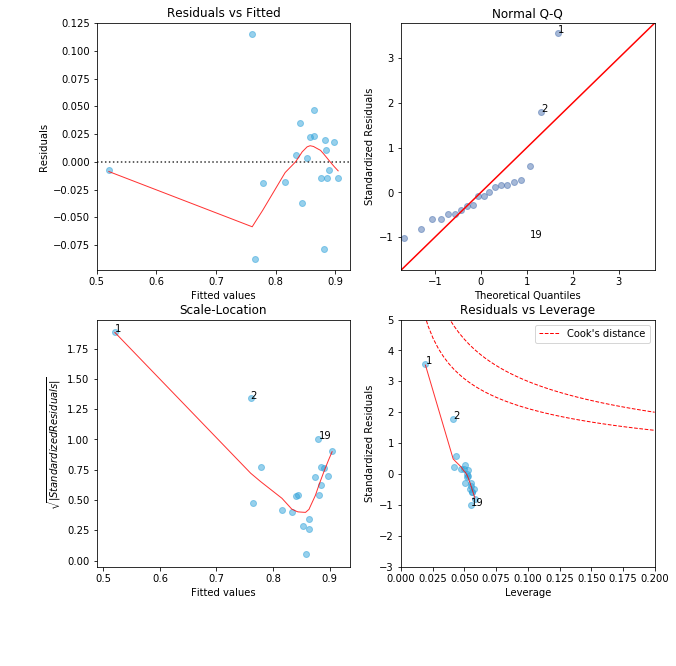

In [37]:
regression_residual_plots(model_fit, dependent_var="Recommended Likelihood",data=temp)

**Interpretation:** <br>
This analysis is focused on checking the assumptions of a regression model.


WORK ON THIS- Current fill is from another project..

**Residual vs. Fitted:** <br>
Line remains fairly straight, which means that the model does not break the assumption of linearity.

**Normal Q-Q:** <br>
The runoff tails on either end of the plot suggest that the residuals are not normally distributed. This is another limitation of the model.

**Scale-Location:** <br>
There appears to be high residual outliers, breaking the assumption of constant variance. x-axis imbalance.

**Residuals vs Leverage:** <br>
It appears that residual 66 has large leverage and effect on the regression line.


**Outliers-

***
[**Clustering Dendrogram**](https://python-graph-gallery.com/404-dendrogram-with-heat-map/)

***

## 5.  Working with Text <a id="Text"></a>

Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews.

### Text 5.1 Pe-Processing

In [38]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
1531,W i d e collar,"I fell for the charcoal one and bought standard size m/l. on first wearing with slim jeans, booties and a long sleeved t, the body of the vest was fine. but with wavy shoulder-length hair, i found the large, wide collar overwhelming at the top. i tried folding the collar under, as in the photo of the gray one, but still too much. i altered it by paring it down by 7 inches at the back neck, and tapering down to meet the lapel at mid-chest. the fabric looks like boiled wool, but is actually a ...",4
18378,"Fabulous, petites rejoice","I ordered xs petite. which they are sold out of. but in case you are a different size i wanted to write a review. i'm 5 feet tall and 120 lbs. i am 34 d so busty. the petite did not overwhelm me. the pockets do open. you're supposed to cut the little threads out. ask a dry cleaner or an retailer stylist for help. i like that there is a little ""stiffness"" to the cape. it has holes for your arms. not a poncho. your lucky if they have your size!",5
5560,Finally a sweater dress that's not too tight,I've been looking for a cozy sweater dress for a while because everything always seems to be so form fitting. i'm between an xs and a small and i got the small for this and it's just a little roomy so it's perfect. fabric is pretty thin so it drapes well and it won't be too warm.,5
6298,Just doesn't fit right,"I wanted to love this sweater but it is a return. it is a very weird fit, very thick, rug-like material and unfitted. the shoulders are bulky, the top is big and the booty is small. i am 5'2"", 34c and typically wear a small. the arms were very long, way too long. i will say other than that the top was true to size, may look okay on someone who had a larger chest and a smaller bum!",1
7041,"Lovely dress, but runs huge!","The materical is wonderful and light and the color is gorgeous, but the large was absolute gigantic. i'm returning it and sizing down possible to a small, which is unreal, since i wear a size ten normally! i am petite, height-wise, but more than length, there was just so much room width-wise. it swallowed me! the dress itself is lovely, though, so i'm definitely exchanging for a more reasonable size. but definitely size down!",4
3953,I love it!,"I wasn't sure how this was going to look on me, but it was so darned cute, i had to give it a try. and i love it! i'm 5'4"" around 130lbs and i bought both a small and a medium to try. the medium fit best. the length is perfect. hits just a little bit longer than the model but almost the same. the material is light but nothing see thru about it. it is slimming and looks so cute on! so glad i gave it a try.",5
11111,The beauty is in the details,"I love design of this top! it will look beautiful on many body types. the black material is thin, and for my personal level of comfort i will definitely wear a cami under. the details are gorgeous and the neutral colors easy to combine with casual or dressy bottoms. the top ran true to size for me.",5


Evidently, the text data requires further processing .

In [39]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

**Code Explanation:** <br>
This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.

***

**Interpretation:** <br>
In order to process the dataset’s centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality deviance. I contemplated exploring the use of sequential models, such as Long Short-term memory, which would benefit from stopwords, but unfortunately I could only find predictive applications of it, no insight extracting aspects. 

The last piece of data transformation conducted was to bin the continuous variable age into a categorical variable: age category.

***

### 5.2 Sentiment Analysis <a id="Sentiment Analysis"></a>

My first attempt at understanding the customer reviews is to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the contructive variant.

I will also explore the interaction between sentiment score:
- Raiting
- Recommended
- Positive Feedback Count

In [40]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

#### **Code Explanation:** <br>
*Pre-processing* chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code *Applying Model and Variable Creation* classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

- **Neutral/Negative/Postive Score:** Indicates the potency of these classes between 0 and 1. Onl
- **Polarity Score:** Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.

***

**Normalize Plots for Sentiment Distribution**

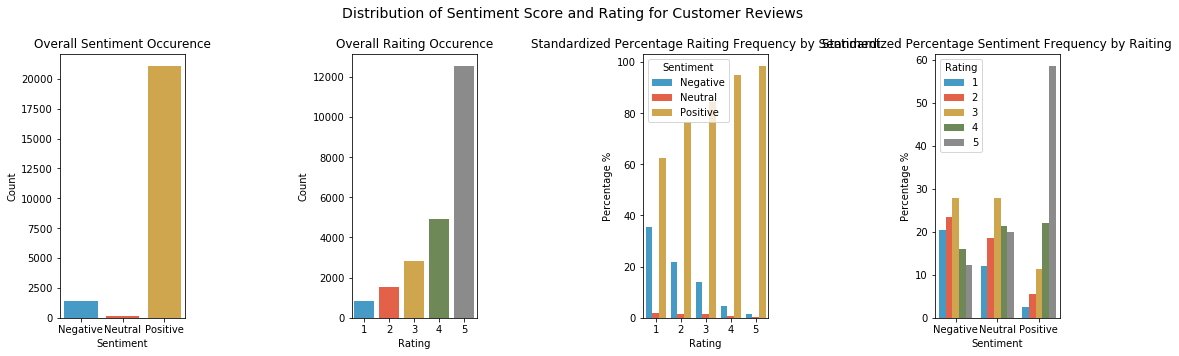

In [41]:
f, axes = plt.subplots(1,4, figsize=[16,5])
sns.countplot(x="Sentiment", data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_title("Overall Sentiment Occurence")

sns.countplot(x="Rating", data=df, ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")
axes[1].set_title("Overall Raiting Occurence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[2])
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Percentage %")
axes[2].set_title("Standardized Percentage Raiting Frequency by Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[3])
axes[3].set_ylabel("Occurence Frequency")
axes[3].set_title("Standardized Percentage Sentiment Frequency by Raiting")
axes[3].set_xlabel("Sentiment")
axes[3].set_ylabel("Percentage %")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()

**Interpretation:** <br>
The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

***


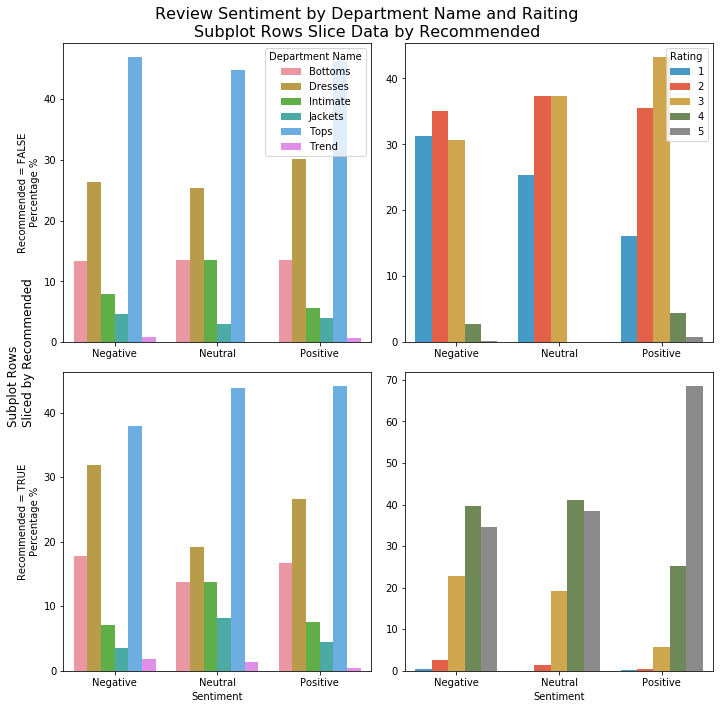

In [42]:

# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

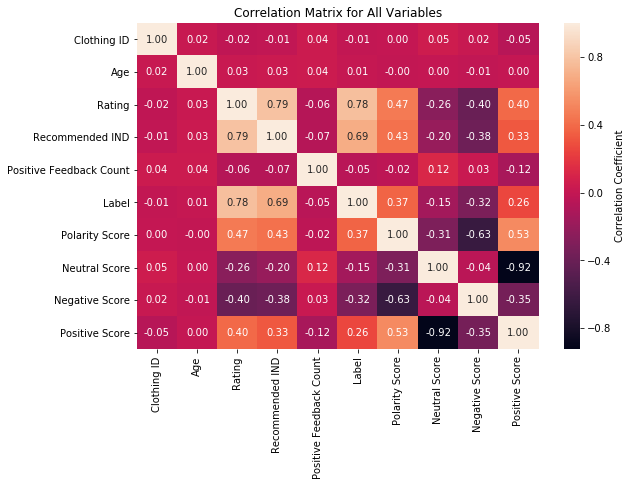

In [43]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

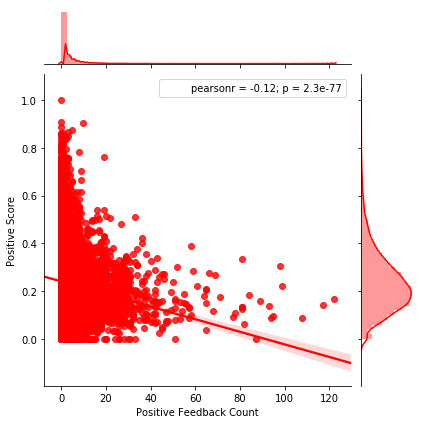

In [44]:
# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.

## 6. Word Distribution and Word Cloud <a id="Word Distribution and Word Cloud"></a> <br>

** For this section, I deviated from the book and heavily relied upon the following online resources:** <br>
- [Kaggle Longdoa: Word Cloud in Python](https://www.kaggle.com/longdoan/word-cloud-with-python)
- [Word Cloud Package Forum](https://github.com/amueller/word_cloud/issues/134)
- [Amueller Github](https://amueller.github.io/word_cloud/auto_examples/masked.html)

In [45]:
stopwords = set(STOPWORDS)
size = (20,10)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

#### **Code Explanation:** <br>
This code creates the word cloud visualization function. This function’s mathematical processes are hidden, since it does not explicitly state that it determines the frequency occurrence of each word in relation to the entire dictionary of words. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence. 

### Visualize Titles

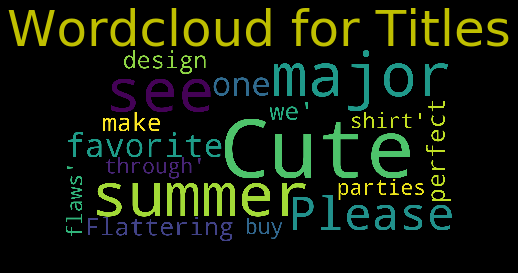

In [46]:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Wordcloud for Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

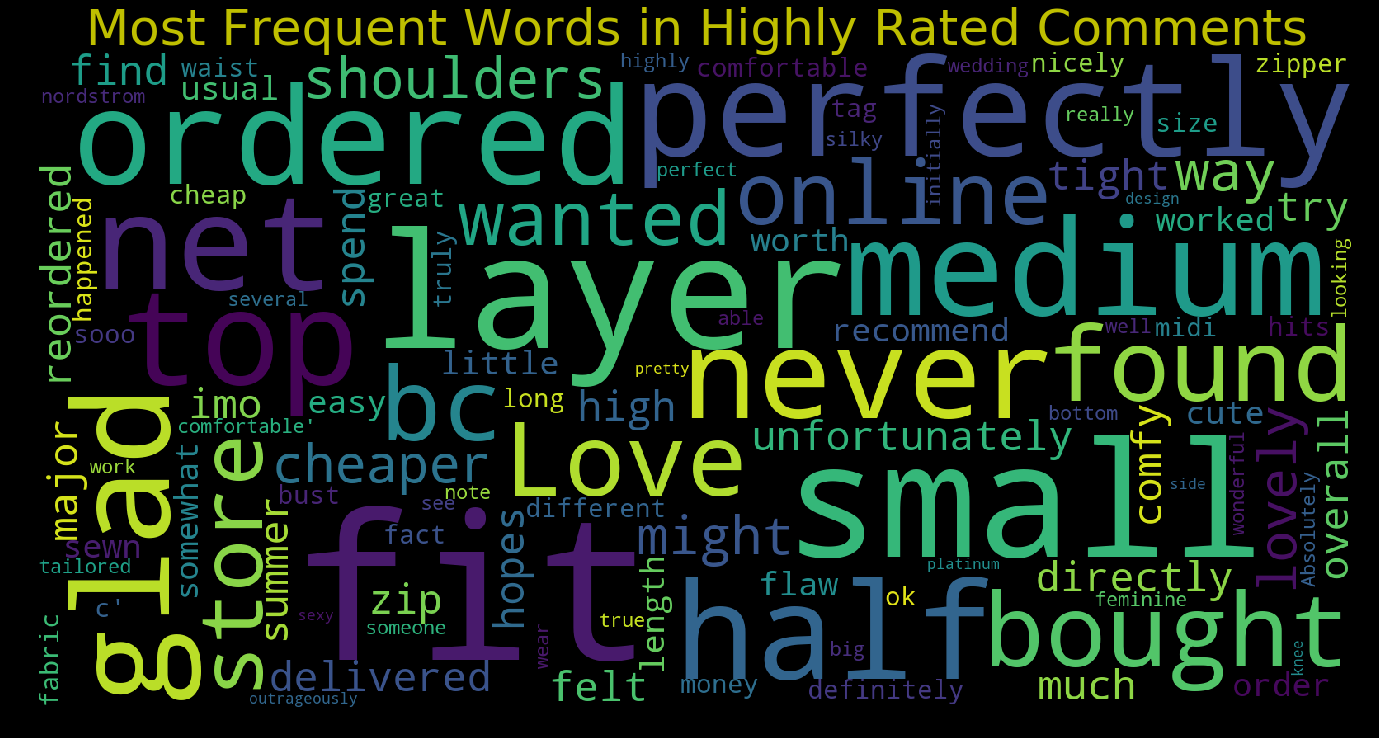

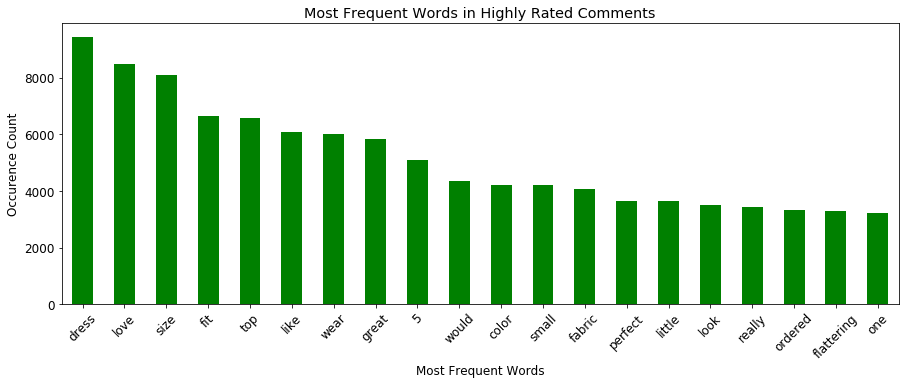

In [47]:
# Highly Raited
title ="Most Frequent Words in Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurence Count")
plt.xlabel("Most Frequent Words")
plt.show()

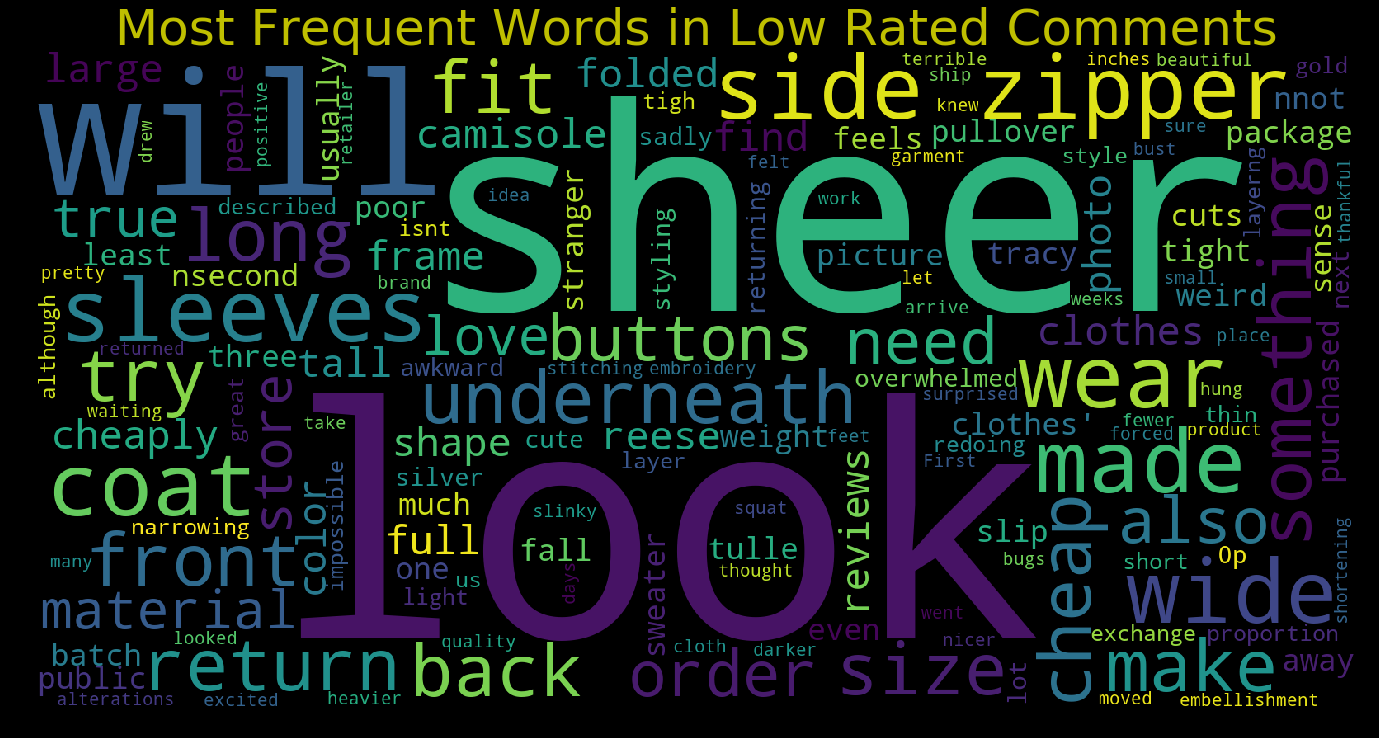

In [48]:
# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

#### **Code Interpretation:** <br>
At a first glance the most common words overlap significantly between good and bad reviews. Indeed, the observation that “Dress” and “Top” are the most common words is reflected by the disproportionate number of reviews in the dress category. Looking at the rest of the words, the positive reviews tend to use words such as: Love, Comfortable, Great, Style, Small, Flattering, Wear, True. This offers the first big insight because within the expected positive words, the words “True” stands out, since it suggest consistency between customer expectation of the product and what the product actually delivered. In terms of negative reviews, notable words include: unflattering, big, unfortunately appear. These negative words represent the small proportion of words in the negative reviews. This suggests that either people are expressing their criticism with negative prefixes, such as “Not Pretty”, or people are sticking to constructive criticism only, addressing problems of fit or appearance rather than simply expressing anger.

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences. Although I would have prefered to visualize these findings through the use of Word Clouds, I was unable to program this in, thus leaving me with a simple table.

In the section below, the 15th most frequent 2 and 3 gram sequences are on display for both the good and bad reviews.

### I am curious to see the wordcloud by Specific group.

Perhaps I can seperate this analysis between clouds and ngrams.

1. Department Name
2. Over 20 Positive Review Count
3. Whether it was Recommended IND

In [49]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()
division_set = df["Division Name"][df["Division Name"].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="WordCloud for {}".format(subclass),
          stopwords= new_stop,
          size = (10,6))

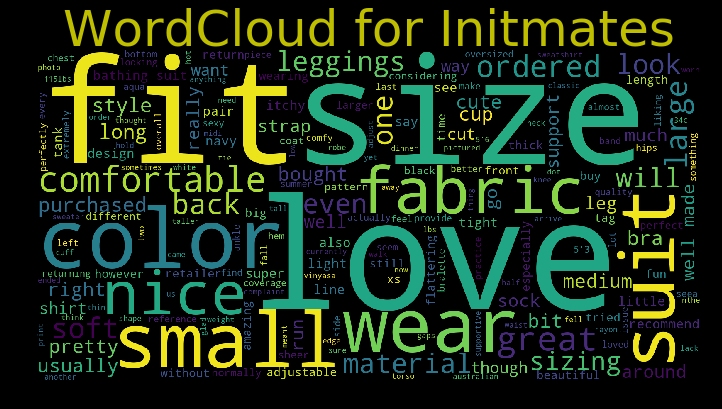

In [50]:
cloud_by_category(df, "Division Name", division_set[0])

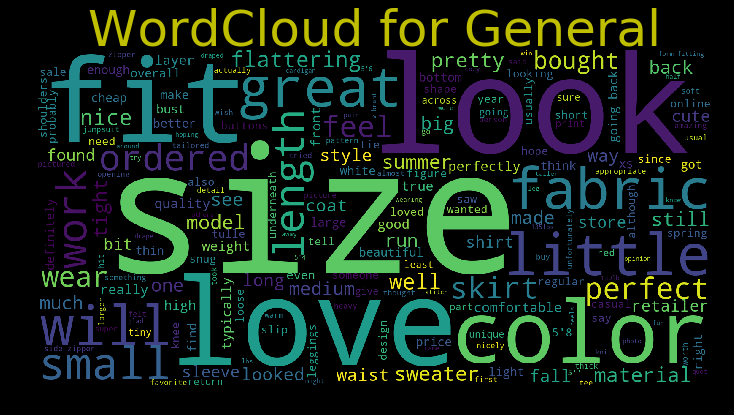

In [51]:
cloud_by_category(df, "Division Name", division_set[1])

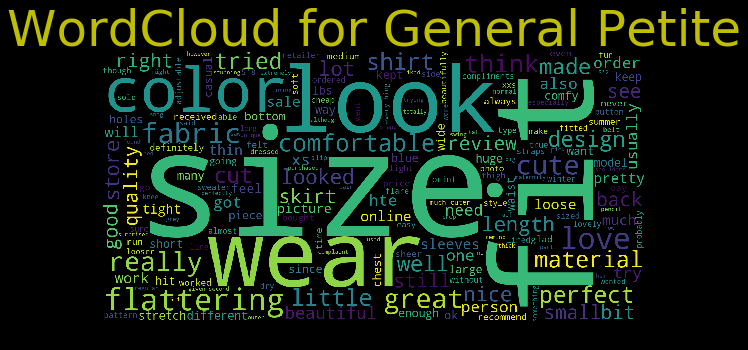

In [52]:
cloud_by_category(df, "Division Name", division_set[2])

## Extract Specific Words

Expand on this section by making new variables out of interesting words.

***
## 7. N Grams by Recommended Feature
<a id="NGRAM"></a>

Create overlapping variable, which singles out worst rating and non-recommendations.

In [53]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [54]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,1976,wanted love,243,really wanted love,70,really wanted love dress,15,reference 5 7 125 lb,3
1,like,1780,going back,215,wanted love dress,65,looked like maternity top,10,photos reference measurements 38 30,3
2,top,1572,looked like,187,really wanted like,40,really wanted like top,9,back really wanted like dress,3
3,would,1348,looks like,153,made look like,29,really wanted like dress,9,medium photos reference measurements 38,3
4,fit,1327,really wanted,151,wanted love top,28,5 4 120 lbs,8,reference measurements 38 30 40,3
5,fabric,1245,made look,135,fit true size,28,really wanted love top,7,wearing medium photos reference measurements,3
6,size,1209,look like,126,way much fabric,25,measurements 38 30 40,6,going back wanted love dress,3
7,back,1039,5 4,113,ordered usual size,25,5 7 140 lbs,6,arm holes also cut low,3
8,look,965,felt like,109,sadly going back,24,going back really wanted,6,would probably look better someone,2
9,love,928,true size,104,like maternity top,23,wanted love dress much,5,returning really wanted love dress,2


In [55]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,8591,true size,1243,fits true size,264,compliments every time wear,46,34b 26 waist 36 hips,27
1,love,8017,love dress,657,fit true size,192,26 waist 36 hips,32,get compliments every time wear,21
2,size,7561,5 4,622,received many compliments,163,34b 26 waist 36,28,5 2 currently 33 25,17
3,fit,5995,usually wear,588,runs true size,143,looks great skinny jeans,25,115 lbs 30 dd 26,15
4,top,5846,looks great,574,love love love,138,get compliments every time,23,115 lbs 30dd 26 5,13
5,wear,5678,fit perfectly,553,usually wear size,107,115 lbs 30 dd,22,lbs 30 dd 26 5,13
6,great,5584,well made,531,every time wear,81,love love love dress,22,2 currently 33 25 37,13
7,like,5368,love top,524,ordered usual size,79,usually wear size 4,21,30 dd 26 5 waist,12
8,5,4678,5 3,488,small fit perfectly,72,5 4 120 lbs,20,5 2 34b 26 waist,12
9,color,3887,fits perfectly,480,got many compliments,70,5 5 135lbs 34c,18,5 1 5 115 lbs,12


## 8. Intelligible Supervised Learning

**Converting Text to a Model-able format: One Hot Encoding**

In [56]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # Apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['Review Text'])) # Calculate word occurence from whole block of text

vocab_count = 300
word_features= list(all_words.keys())[:vocab_count] # 5000 most recurring unique words
print("Number of words columns (One Hot Encoding): {}".format(len(all_words)))

Number of words columns (One Hot Encoding): 14034


In [57]:
labtext= list(zip(df.tokenized, (df["Recommended IND"]))) 

In [58]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [59]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

22628

In [60]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## 8.1 Naive Bayes

Side on WHY this model was selected.

In [61]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Posterior = prior_occurence * likelihood / evidence

In [62]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier accuracy percent: 82.3413738857
Most Informative Features
                     rip = True                0 : 1      =      7.9 : 1.0
                     300 = True                0 : 1      =      7.7 : 1.0
              disappoint = True                0 : 1      =      6.1 : 1.0
                     sum = True                0 : 1      =      4.6 : 1.0
                     dad = True                0 : 1      =      4.6 : 1.0
                   droop = True                0 : 1      =      3.9 : 1.0
                     sky = True                1 : 0      =      3.7 : 1.0
                    club = True                0 : 1      =      3.3 : 1.0
                    miss = True                0 : 1      =      3.1 : 1.0
                     app = True                0 : 1      =      2.8 : 1.0
                  lesson = True                0 : 1      =      2.8 : 1.0
                    join = True                0 : 1      =      2.8 : 1.0
                     yet = True

## Word2Vec

In [63]:
import gensim
from gensim.models import word2vec
import os
os.chdir(r"D:\My Computer\DATA\Retail")
os.listdir()

['featuresets.pickle', 'GoogleNews-vectors-negative300.bin.gz']

In [64]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [65]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,1,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]"
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,1,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]"
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,1,0.9427,0.792,0.027,0.181,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,1,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,1,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]"


In [66]:
w2vec = word2vec.Word2Vec(df["tokenized"], min_count=5, size=200)

In [67]:
w2vec.most_similar(["versatil"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dressi', 0.8884586095809937),
 ('casual', 0.887437105178833),
 ('everyday', 0.8755813837051392),
 ('statement', 0.8731184005737305),
 ('classi', 0.8650057315826416),
 ('fun', 0.8432307243347168),
 ('throw', 0.8360174298286438),
 ('blazer', 0.828228771686554),
 ('outfit', 0.8244336843490601),
 ('stylish', 0.823321521282196)]

In [68]:
w2vec.most_similar(["potato"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('circu', 0.9148889183998108),
 ('frankli', 0.9103468060493469),
 ('moo', 0.8694467544555664),
 ('sack', 0.8593577146530151),
 ('jut', 0.8473852872848511),
 ('giant', 0.83619624376297),
 ('halloween', 0.834078848361969),
 ('dumpi', 0.8340777158737183),
 ('unattract', 0.8326643705368042),
 ('1920', 0.8280210494995117)]

In [69]:
w2vec.most_similar(["worst"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pouch', 0.9340859651565552),
 ('tug', 0.9330511689186096),
 ('test', 0.9320132732391357),
 ('seriou', 0.9310933947563171),
 ('repair', 0.9293428659439087),
 ('flatten', 0.9272376298904419),
 ('wind', 0.9265644550323486),
 ('yep', 0.9253203868865967),
 ('common', 0.9227120876312256),
 ('hurt', 0.9223040342330933)]

In [70]:
w2vec.most_similar(["rag"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('messi', 0.89544677734375),
 ('harder', 0.8918055891990662),
 ('skew', 0.8898700475692749),
 ('unstructur', 0.88982754945755),
 ('bathrob', 0.8893040418624878),
 ('easier', 0.8878797292709351),
 ('nightgown', 0.8858096599578857),
 ('rea', 0.8837499022483826),
 ('costum', 0.8819435834884644),
 ('static', 0.8817684650421143)]

In [71]:
w2vec.most_similar(["compliment"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('complement', 0.8635106682777405),
 ('ton', 0.8351932764053345),
 ('numer', 0.7698694467544556),
 ('mani', 0.6903306245803833),
 ('stranger', 0.6595568060874939),
 ('countless', 0.652073860168457),
 ('galor', 0.6369425058364868),
 ('whenev', 0.6344470381736755),
 ('load', 0.6315754652023315),
 ('friend', 0.6221033930778503)]

In [72]:
w2vec.most_similar(["love"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ador', 0.8400560617446899),
 ('amaz', 0.7147856950759888),
 ('gorgeou', 0.7119218111038208),
 ('beauti', 0.6944970488548279),
 ('fabul', 0.6330525875091553),
 ('awesom', 0.632310688495636),
 ('wonder', 0.6305444240570068),
 ('sweet', 0.6256086230278015),
 ('fantast', 0.6145307421684265),
 ('classic', 0.6080268621444702)]

In [73]:
w2vec.most_similar(["shame"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('receipt', 0.9155788421630859),
 ('clip', 0.9115681052207947),
 ('wing', 0.9056868553161621),
 ('misshapen', 0.9027939438819885),
 ('wonki', 0.9020730257034302),
 ('loo', 0.9013630747795105),
 ('obvious', 0.8949640989303589),
 ('repair', 0.8923380970954895),
 ('safeti', 0.8911653757095337),
 ('ugli', 0.8904269933700562)]

In [74]:
w2vec.most_similar(["dear"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lookout', 0.9578248262405396),
 ('ranna', 0.9516728520393372),
 ('gill', 0.9415563344955444),
 ('lover', 0.9389081001281738),
 ('floreat', 0.9380861520767212),
 ('signatur', 0.9370781183242798),
 ('articl', 0.9366747140884399),
 ('fav', 0.934729814529419),
 ('brainer', 0.9315890669822693),
 ('heard', 0.9313700199127197)]